# Step1: Import necessary libraries for training, preprocessing, exploratory analysis, metrics ...

In [283]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from warnings import filterwarnings
filterwarnings('ignore')

In [284]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.autoscale()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Step2: Import data into dataframe

In [314]:
train_features = pd.read_csv("./train/X_train.txt",header=None, delimiter=r"\s+")
test_features  = pd.read_csv("./test/X_test.txt",header=None, delimiter=r"\s+")

In [286]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [287]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


# Data pre-processing

<b>Check if any duplicate rows are available </b>

In [315]:
train_features[train_features.duplicated()].count().sum()

0

<b>Check if any null values are present and impute them with column mean (if the count is insignificant)  </b>

In [316]:
Imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [317]:
train_features = Imputer.fit_transform(train_features.values)
train_features = pd.DataFrame(train_features)

In [318]:
train_features.isnull().sum().sum()

0

<b>Transform features by scaling each feature between [-1 1]</b>

In [320]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [321]:
train_features = pd.DataFrame(scaler.fit_transform(train_features.values))

In [322]:
train_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.489659,-0.604754,-0.630512,-0.519133,-0.606150,-0.468604,...,0.156104,-0.306414,-0.617225,-0.003062,0.002186,0.009381,-0.004028,-0.489547,0.432314,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.524651,0.418687,0.424073,0.493927,0.414122,0.544547,...,0.257866,0.323454,0.314405,0.340777,0.448306,0.608698,0.478914,0.511807,0.402501,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.977304,-0.980233,-0.993591,-0.977803,-0.980251,-0.936219,...,0.003039,-0.543799,-0.842389,-0.134816,-0.289549,-0.481937,-0.375116,-0.812065,0.328838,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.845545,-0.859365,-0.950709,-0.854984,-0.857143,-0.881637,...,0.165048,-0.343369,-0.705539,-0.002227,0.008943,0.009390,0.001596,-0.709417,0.599385,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,0.007919,-0.262415,-0.292680,-0.051363,-0.265671,-0.017129,...,0.324391,-0.125013,-0.493116,0.140804,0.292861,0.507165,0.362039,-0.509079,0.689066,0.107659
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [319]:
train_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


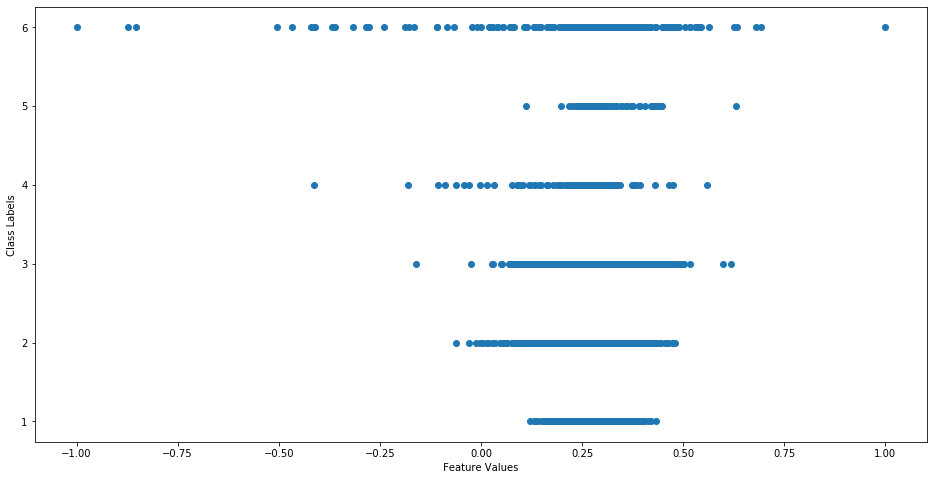

In [295]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_features[0],train_labels)
plt.xlabel(" Feature Values ")
plt.ylabel(" Class Labels ")
plt.show()

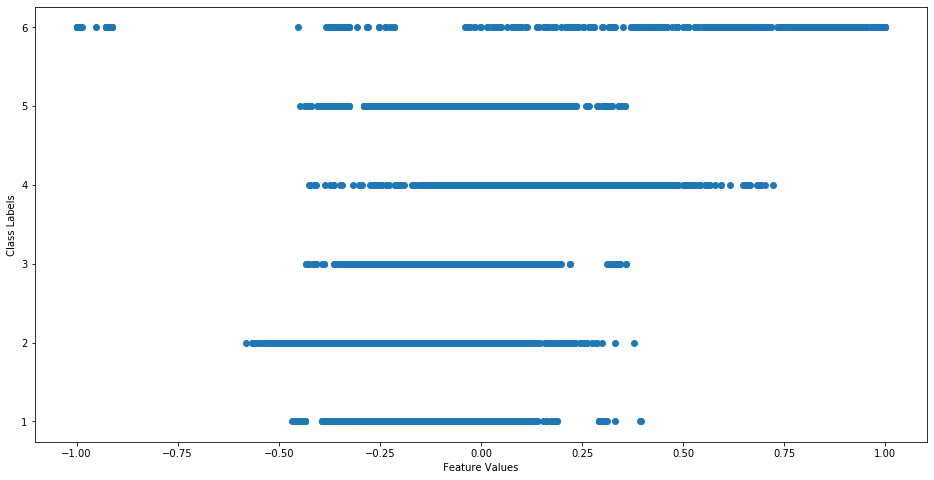

In [296]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_features[51],train_labels)
plt.xlabel(" Feature Values ")
plt.ylabel(" Class Labels ")
plt.show()

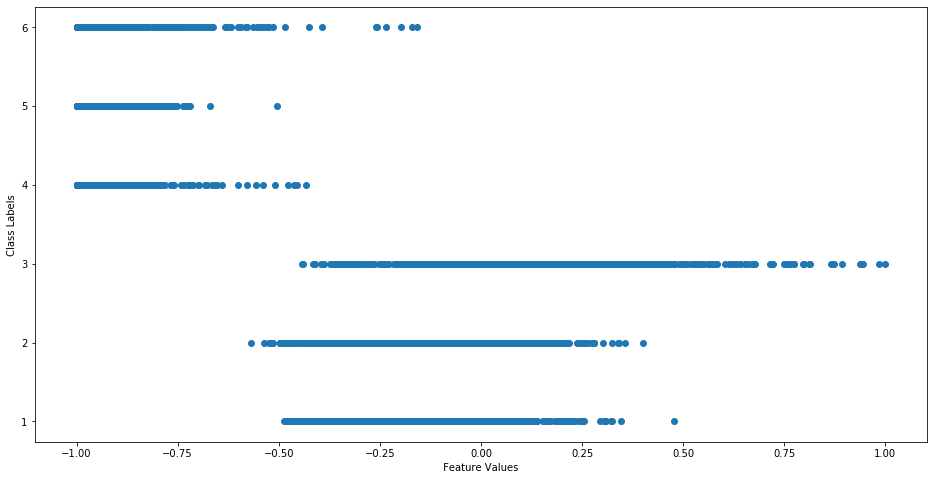

In [297]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_features[280],train_labels)
plt.xlabel(" Feature Values ")
plt.ylabel(" Class Labels ")
plt.show()

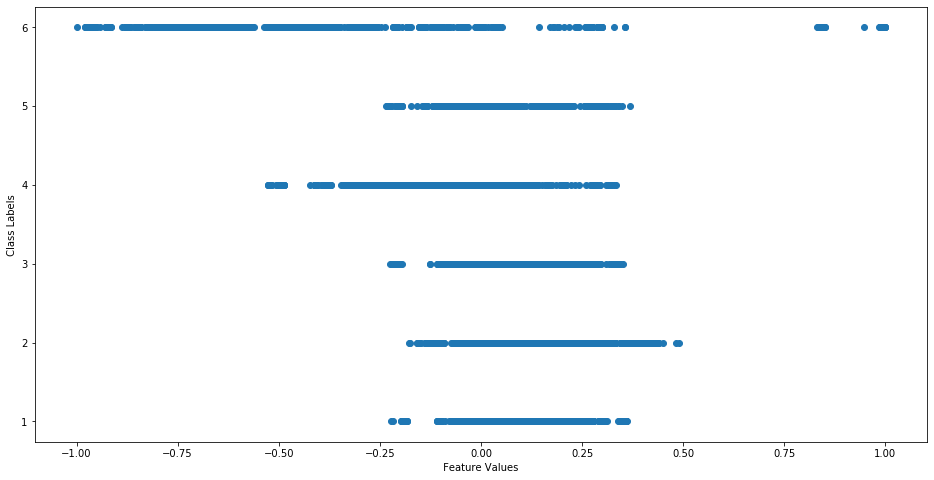

In [298]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_features[560],train_labels)
plt.xlabel(" Feature Values ")
plt.ylabel(" Class Labels ")
plt.show()

Before removing outliers , rows -  7352
After removing outliers , rows - 7152
Number of records deleted -  200


<b> Repeat same preprocessing steps for test_features as well </b>

In [299]:
test_features = Imputer.fit_transform(test_features.values)
test_features = pd.DataFrame(test_features)
# Gives a final sum across dataframe
test_features.isnull().sum().sum()


0

In [300]:
scaler = MinMaxScaler(feature_range=(-1,1))
test_features = pd.DataFrame(scaler.fit_transform(test_features.values))
test_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.370371,0.133092,-0.125855,-0.473042,-0.508330,-0.509414,-0.502264,-0.522741,-0.492787,-0.436053,...,0.025771,-0.277593,-0.598756,0.005818,0.007402,0.039500,-0.021847,-0.482471,0.033169,-0.063113
std,0.095848,0.084551,0.079879,0.563309,0.494269,0.487283,0.535343,0.479919,0.501457,0.602620,...,0.258765,0.317245,0.311042,0.336333,0.449630,0.635339,0.503553,0.560374,0.338924,0.251222
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.351507,0.109783,-0.149729,-0.988132,-0.973664,-0.969325,-0.990155,-0.974216,-0.966995,-0.979399,...,-0.129554,-0.517494,-0.829593,-0.130062,-0.281927,-0.519762,-0.434763,-0.830004,-0.021956,-0.114888
50%,0.375303,0.136037,-0.125990,-0.906625,-0.790972,-0.769698,-0.914177,-0.799985,-0.745042,-0.885325,...,0.039704,-0.311023,-0.683672,0.005742,0.010400,0.046588,-0.031318,-0.719874,0.144656,-0.023527
75%,0.392684,0.158448,-0.104808,-0.000330,-0.105919,-0.076318,-0.058147,-0.133537,-0.052283,0.083961,...,0.202842,-0.083559,-0.458332,0.146832,0.294624,0.621943,0.391679,-0.517705,0.226893,0.083680
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [301]:
train_labels=pd.read_csv("./train/y_train.txt",header=None)
train_labels.columns=['label']
test_labels=pd.read_csv("./test/y_test.txt",header=None)
test_labels.columns=['label']

In [302]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
label    7352 non-null int64
dtypes: int64(1)
memory usage: 57.6 KB


In [303]:
test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
label    2947 non-null int64
dtypes: int64(1)
memory usage: 23.1 KB


In [304]:
activities=['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

In [305]:
train_labels_copy = train_labels.copy()
train_labels_copy['label'] = train_labels_copy['label'].apply(lambda x: activities[x - 1])
test_labels_copy = test_labels.copy()
test_labels_copy['label'] = test_labels_copy['label'].apply(lambda x: activities[x - 1])

In [306]:
train_labels_copy['label'].value_counts()


LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: label, dtype: int64

In [307]:
test_labels_copy['label'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: label, dtype: int64

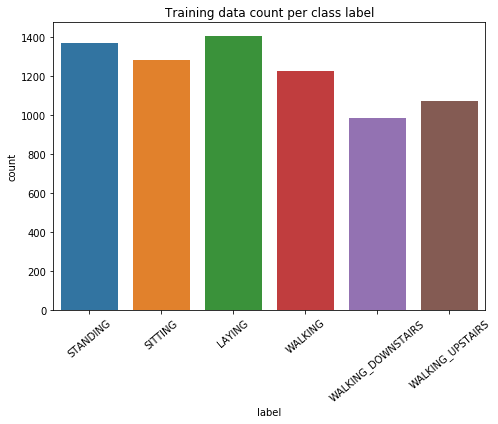

In [308]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
axis = sns.countplot(x='label',data=train_labels_copy,)
axis.set_xticklabels(axis.get_xticklabels(), rotation=40)
plt.title("Training data count per class label")
plt.show()

# Training models

# 1. Logistic Regression

In [309]:
lr_params = {'C':np.logspace(-1, 1, 10),
             'max_iter':[10,100]}
lr = LogisticRegression(solver='lbfgs')
gridcv_lr = GridSearchCV(lr, lr_params, verbose=1, cv=3)

In [323]:

gridcv_lr.fit(train_features,train_labels['label'].ravel())


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   35.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ]),
                         'max_iter': [10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [324]:
gridcv_lr.best_params_

{'C': 10.0, 'max_iter': 100}

In [325]:
lr_predictions = gridcv_lr.predict(test_features)

In [326]:
print(classification_report(test_labels,lr_predictions))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96       496
           2       1.00      0.90      0.94       471
           3       0.96      1.00      0.98       420
           4       0.67      0.98      0.80       491
           5       0.97      0.56      0.71       532
           6       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.92      0.90      0.90      2947
weighted avg       0.92      0.90      0.90      2947



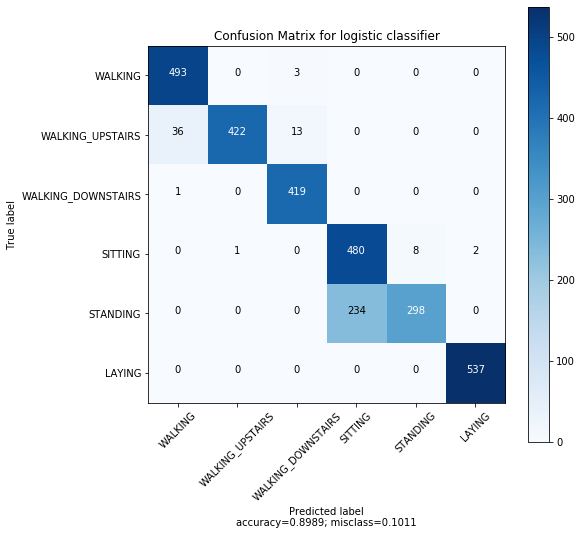

In [327]:
plot_confusion_matrix(confusion_matrix(test_labels,lr_predictions),
                      normalize    = False,
                      target_names = activities,
                      title        = "Confusion Matrix for logistic classifier")

# 2. KNN

In [328]:
knn_params = {'n_neighbors':np.array(range(9,18))}
knn = KNeighborsClassifier()
gridcv_knn = GridSearchCV(knn, knn_params, verbose=False, cv=3)

In [329]:

gridcv_knn.fit(train_features,train_labels['label'].ravel())



GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 9, 10, 11, 12, 13, 14, 15, 16, 17])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [330]:
gridcv_knn.best_params_

{'n_neighbors': 17}

In [331]:
knn_predictions = gridcv_knn.predict(test_features)

In [332]:
print(classification_report(test_labels,knn_predictions))

              precision    recall  f1-score   support

           1       0.88      0.98      0.93       496
           2       0.91      0.92      0.92       471
           3       0.96      0.82      0.88       420
           4       0.86      0.88      0.87       491
           5       0.89      0.87      0.88       532
           6       1.00      0.99      1.00       537

    accuracy                           0.91      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.91      0.91      2947



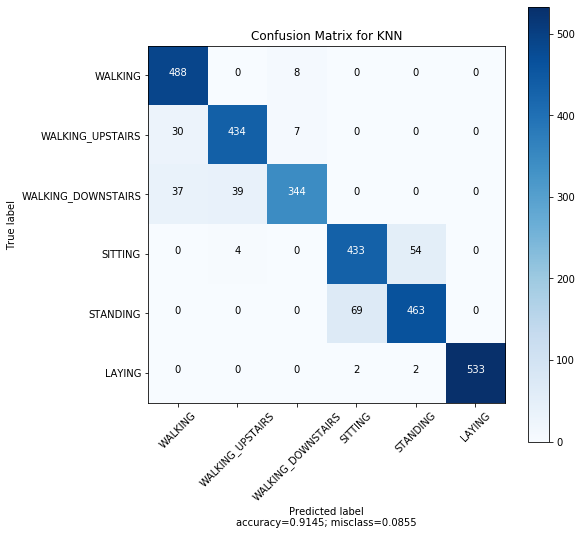

In [333]:
plot_confusion_matrix(confusion_matrix(test_labels,knn_predictions),
                      normalize    = False,
                      target_names = activities,
                      title        = "Confusion Matrix for KNN")

# 3.Random Forest

In [334]:
rf_params = {'n_estimators' : np.arange(10,30,10),'max_depth' : np.arange(1,6,2)}
rf = RandomForestClassifier(random_state=0)
gridcv_rf = GridSearchCV(rf, rf_params, verbose=False, cv=3)


In [335]:
gridcv_rf.fit(train_features,train_labels['label'].ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [336]:
gridcv_rf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [337]:
rf_predictions = gridcv_rf.predict(test_features)

In [338]:
print(classification_report(test_labels,rf_predictions))

              precision    recall  f1-score   support

           1       0.84      0.94      0.89       496
           2       0.87      0.92      0.90       471
           3       0.92      0.73      0.82       420
           4       0.64      0.93      0.76       491
           5       0.90      0.52      0.66       532
           6       1.00      1.00      1.00       537

    accuracy                           0.84      2947
   macro avg       0.86      0.84      0.84      2947
weighted avg       0.86      0.84      0.84      2947



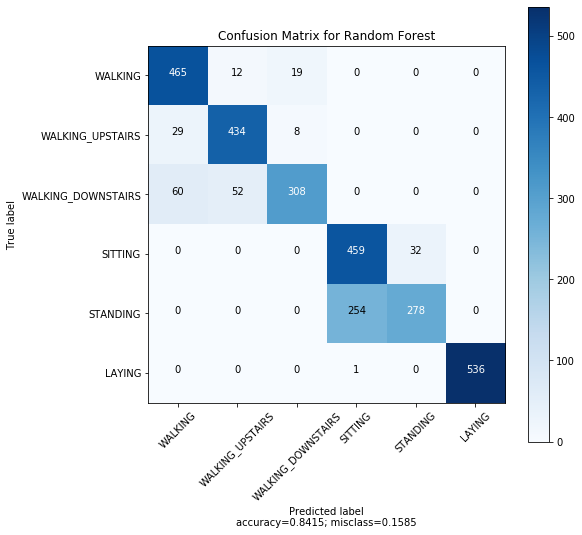

In [339]:
plot_confusion_matrix(confusion_matrix(test_labels,rf_predictions),
                      normalize    = False,
                      target_names = activities,
                      title        = "Confusion Matrix for Random Forest")

# selecting important features using random forest model

In [340]:
new_rf = RandomForestClassifier(random_state=0,max_depth=5,n_estimators=20)

In [341]:
new_rf.fit(train_features,train_labels['label'].ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [342]:
newrf_predictions = new_rf.predict(test_features)

In [343]:
print(classification_report(test_labels,newrf_predictions))

              precision    recall  f1-score   support

           1       0.84      0.94      0.89       496
           2       0.87      0.92      0.90       471
           3       0.92      0.73      0.82       420
           4       0.64      0.93      0.76       491
           5       0.90      0.52      0.66       532
           6       1.00      1.00      1.00       537

    accuracy                           0.84      2947
   macro avg       0.86      0.84      0.84      2947
weighted avg       0.86      0.84      0.84      2947



In [344]:
imp_features= new_rf.feature_importances_

In [345]:
remove_col = []
for i in range(len(imp_features)):
    if imp_features[i] == 0:
        remove_col.append(i)

In [346]:
train_copy = train_features.copy()

In [347]:

train_copy = train_copy.drop(remove_col,axis=1)

In [348]:
train_copy.describe()

,3,6,7,9,10,13,15,16,17,18,...,537,538,541,549,552,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.605438,-0.630512,-0.519133,-0.468604,-0.306043,0.387386,-0.547569,-0.820041,-0.901875,-0.845784,...,-0.889442,-0.047826,-0.779379,-0.284627,-0.306414,0.009381,-0.004028,-0.489547,0.432314,-0.056515
std,0.448734,0.424073,0.493927,0.544547,0.282243,0.343611,0.471808,0.259607,0.126333,0.221983,...,0.157653,0.283018,0.275734,0.630896,0.323454,0.608698,0.478914,0.511807,0.402501,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.992754,-0.993591,-0.977803,-0.936219,-0.563561,0.101829,-0.982992,-0.999936,-0.999787,-0.999460,...,-1.000000,-0.242435,-0.993104,-0.955696,-0.543799,-0.481937,-0.375116,-0.812065,0.328838,-0.143414
50%,-0.946196,-0.950709,-0.854984,-0.881637,-0.479677,0.627737,-0.885461,-0.998046,-0.994066,-0.985546,...,-0.948718,-0.062925,-0.952402,-0.455569,-0.343369,0.009390,0.001596,-0.709417,0.599385,0.003181
75%,-0.242813,-0.292680,-0.051363,-0.017129,-0.065364,0.685622,-0.107428,-0.710707,-0.816705,-0.748018,...,-0.846154,0.147729,-0.611955,0.336785,-0.125013,0.507165,0.362039,-0.509079,0.689066,0.107659
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [349]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 228 entries, 3 to 560
dtypes: float64(228)
memory usage: 12.8 MB


In [350]:
test_copy = test_features.copy()

In [351]:
test_copy = test_copy.drop(remove_col,axis=1)

In [352]:
test_copy.describe()

,3,6,7,9,10,13,15,16,17,18,...,537,538,541,549,552,556,557,558,559,560
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,-0.613635,-0.641278,-0.522676,-0.462063,-0.303028,0.394903,-0.563359,-0.838978,-0.904777,-0.876810,...,-0.880905,-0.029208,-0.780744,-0.248673,-0.277593,0.040029,-0.017298,-0.513923,0.074886,-0.048720
std,0.412597,0.385199,0.479899,0.523916,0.274075,0.326645,0.434127,0.211957,0.125120,0.157134,...,0.165518,0.273403,0.246152,0.606778,0.317245,0.634989,0.501311,0.509205,0.324300,0.241467
min,-0.999606,-0.999417,-0.999914,-0.952357,-0.583487,-0.880782,-0.998967,-0.999999,-1.000000,-0.999992,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228
25%,-0.990914,-0.992333,-0.974131,-0.934447,-0.559938,0.147252,-0.978328,-0.999909,-0.999721,-0.999280,...,-1.000000,-0.221124,-0.989330,-0.895847,-0.517494,-0.518924,-0.428375,-0.829722,0.022140,-0.098485
50%,-0.931214,-0.937664,-0.799907,-0.852659,-0.436526,0.594357,-0.861996,-0.996592,-0.988943,-0.979327,...,-0.948718,-0.029349,-0.916276,-0.290417,-0.311023,0.047113,-0.026726,-0.729648,0.181563,-0.010671
75%,-0.267395,-0.321719,-0.133488,-0.009965,-0.075040,0.683272,-0.154299,-0.727769,-0.842496,-0.781542,...,-0.846154,0.159855,-0.613892,0.339070,-0.083559,0.622151,0.394387,-0.545939,0.260252,0.092373
max,0.465299,0.439657,1.000000,0.786436,0.674711,0.707630,0.485138,0.074741,-0.233803,-0.013052,...,0.128205,0.977755,0.233995,0.838320,1.000000,1.000000,1.000000,0.833180,1.000000,0.973113


In [353]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 228 entries, 3 to 560
dtypes: float64(228)
memory usage: 5.1 MB


In [354]:
new_knn = KNeighborsClassifier(n_neighbors=17)
new_knn.fit(train_copy,train_labels['label'].ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [355]:
new_knn_predictions = new_knn.predict(test_copy)
print(classification_report(test_labels,new_knn_predictions))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95       496
           2       0.93      0.89      0.91       471
           3       0.90      0.89      0.89       420
           4       0.85      0.95      0.89       491
           5       0.95      0.84      0.89       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



In [356]:
rf_params = {'n_estimators' : np.arange(10,30,10),'max_depth' : np.arange(1,6,2)}
new_rf = RandomForestClassifier(random_state=0)
new_gridcv_rf = GridSearchCV(new_rf, rf_params, verbose=False, cv=3)


In [357]:
new_gridcv_rf.fit(train_copy,train_labels['label'].ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [358]:

new_gridcv_rf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [359]:

newrf_predictions = new_gridcv_rf.predict(test_copy)

In [361]:

print(classification_report(test_labels,newrf_predictions))

              precision    recall  f1-score   support

           1       0.79      0.94      0.86       496
           2       0.87      0.84      0.85       471
           3       0.93      0.76      0.84       420
           4       0.54      1.00      0.70       491
           5       1.00      0.23      0.37       532
           6       1.00      1.00      1.00       537

    accuracy                           0.79      2947
   macro avg       0.86      0.79      0.77      2947
weighted avg       0.86      0.79      0.77      2947



# 4. Final result

In [362]:
knn_res = [gridcv_knn.score(train_features,train_labels),
           gridcv_knn.score(test_features,test_labels),
           precision_score(test_labels,knn_predictions,average ='weighted'),
           recall_score(test_labels,knn_predictions,average ='weighted'),
           f1_score(test_labels,knn_predictions,average ='weighted')]


In [363]:
result = pd.DataFrame(np.array(knn_res).reshape(-1,5))

In [364]:
lr_res = [gridcv_lr.score(train_features,train_labels),
         gridcv_lr.score(test_features,test_labels),
         precision_score(test_labels,lr_predictions,average ='weighted'),
         recall_score(test_labels,lr_predictions,average ='weighted'),
         f1_score(test_labels,lr_predictions,average ='weighted')]
lr_res = pd.DataFrame(np.array(lr_res).reshape(-1,5))

In [365]:
result = pd.concat([result,lr_res])

In [366]:
rf_res = [gridcv_rf.score(train_features,train_labels),
       gridcv_rf.score(test_features,test_labels),
       precision_score(test_labels,rf_predictions,average ='weighted'),
       recall_score(test_labels,rf_predictions,average ='weighted'),
       f1_score(test_labels,rf_predictions,average ='weighted')]
rf_res = pd.DataFrame(np.array(rf_res).reshape(-1,5))

In [367]:
result = pd.concat([result,rf_res])

In [368]:
lab=['Train Accuracy','Test Accuracy','Precision','Recall','F1 score']
models =['KNN','Logistic Regression','Random Forest']
idx=[1,2,3]
result.index = [idx,models]
result.columns=lab

In [369]:
result

,,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
1,KNN,0.969124,0.914489,0.916370,0.914489,0.914102
2,Logistic Regression,0.994015,0.898880,0.922631,0.898880,0.895320
3,Random Forest,0.937296,0.841534,0.862797,0.841534,0.836698


<b>Remove outliers using zscore, before removing check how many to delete</b>

In [ ]:
prev_rows = len(train_features)
data_copy = train_features.copy()
z_score = np.abs(stats.zscore(train_features))
data_copy = data_copy[(z_score < 10).all(axis=1)]
print("Before removing outliers , rows - ", prev_rows)
print("After removing outliers , rows -", len(data_copy))
print("Number of records deleted - ", (prev_rows - len(data_copy)))